In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)

2.0.0-beta1


In [6]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [7]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results


In [8]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

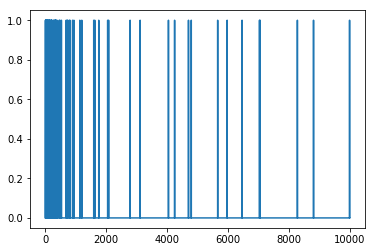

In [9]:
plt.plot(test_data[30])

In [10]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
baseline_history = baseline_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

W0712 08:02:10.838006 140061598660352 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 11s - loss: 0.5155 - accuracy: 0.8058 - binary_crossentropy: 0.5155 - val_loss: 0.3595 - val_accuracy: 0.8722 - val_binary_crossentropy: 0.3595
Epoch 2/20
25000/25000 - 9s - loss: 0.2652 - accuracy: 0.9078 - binary_crossentropy: 0.2652 - val_loss: 0.2867 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2867
Epoch 3/20
25000/25000 - 8s - loss: 0.1912 - accuracy: 0.9320 - binary_crossentropy: 0.1912 - val_loss: 0.2865 - val_accuracy: 0.8858 - val_binary_crossentropy: 0.2865
Epoch 4/20
25000/25000 - 8s - loss: 0.1539 - accuracy: 0.9468 - binary_crossentropy: 0.1539 - val_loss: 0.3099 - val_accuracy: 0.8789 - val_binary_crossentropy: 0.3099
Epoch 5/20
25000/25000 - 8s - loss: 0.1262 - accuracy: 0.9574 - binary_crossentropy: 0.1262 - val_loss: 0.3293 - val_accuracy: 0.8774 - val_binary_crossentropy: 0.3293
Epoch 6/20
25000/25000 - 8s - loss: 0.1050 - accuracy: 0.9670 - binary_crossentropy: 0.1050 - val_loss: 0.358

In [12]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [13]:
smaller_history = smaller_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 9s - loss: 0.6439 - accuracy: 0.5561 - binary_crossentropy: 0.6439 - val_loss: 0.5953 - val_accuracy: 0.7188 - val_binary_crossentropy: 0.5953
Epoch 2/20
25000/25000 - 8s - loss: 0.5468 - accuracy: 0.7770 - binary_crossentropy: 0.5468 - val_loss: 0.5322 - val_accuracy: 0.8073 - val_binary_crossentropy: 0.5322
Epoch 3/20
25000/25000 - 8s - loss: 0.4855 - accuracy: 0.8546 - binary_crossentropy: 0.4855 - val_loss: 0.4913 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.4913
Epoch 4/20
25000/25000 - 8s - loss: 0.4401 - accuracy: 0.8915 - binary_crossentropy: 0.4401 - val_loss: 0.4642 - val_accuracy: 0.8672 - val_binary_crossentropy: 0.4642
Epoch 5/20
25000/25000 - 8s - loss: 0.4059 - accuracy: 0.9132 - binary_crossentropy: 0.4059 - val_loss: 0.4480 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.4480
Epoch 6/20
25000/25000 - 8s - loss: 0.3789 - accuracy: 0.9284 - binary_crossentropy: 0.3789 - val_loss: 0.4403

In [14]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 28s - loss: 0.3407 - accuracy: 0.8571 - binary_crossentropy: 0.3407 - val_loss: 0.2932 - val_accuracy: 0.8794 - val_binary_crossentropy: 0.2932
Epoch 2/20
25000/25000 - 28s - loss: 0.1437 - accuracy: 0.9489 - binary_crossentropy: 0.1437 - val_loss: 0.3317 - val_accuracy: 0.8725 - val_binary_crossentropy: 0.3317
Epoch 3/20
25000/25000 - 26s - loss: 0.0482 - accuracy: 0.9857 - binary_crossentropy: 0.0482 - val_loss: 0.4551 - val_accuracy: 0.8661 - val_binary_crossentropy: 0.4551
Epoch 4/20
25000/25000 - 26s - loss: 0.0083 - accuracy: 0.9984 - binary_crossentropy: 0.0083 - val_loss: 0.5820 - val_accuracy: 0.8656 - val_binary_crossentropy: 0.5820
Epoch 5/20
25000/25000 - 26s - loss: 0.0012 - accuracy: 1.0000 - binary_crossentropy: 0.0012 - val_loss: 0.6807 - val_accuracy: 0.8691 - val_binary_crossentropy: 0.6807
Epoch 6/20
25000/25000 - 27s - loss: 2.4544e-04 - accuracy: 1.0000 - binary_crossentropy: 2.4544e-04 - va

In [16]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key], '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history[key],color=val[0].get_color(),label=name.title() + ' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

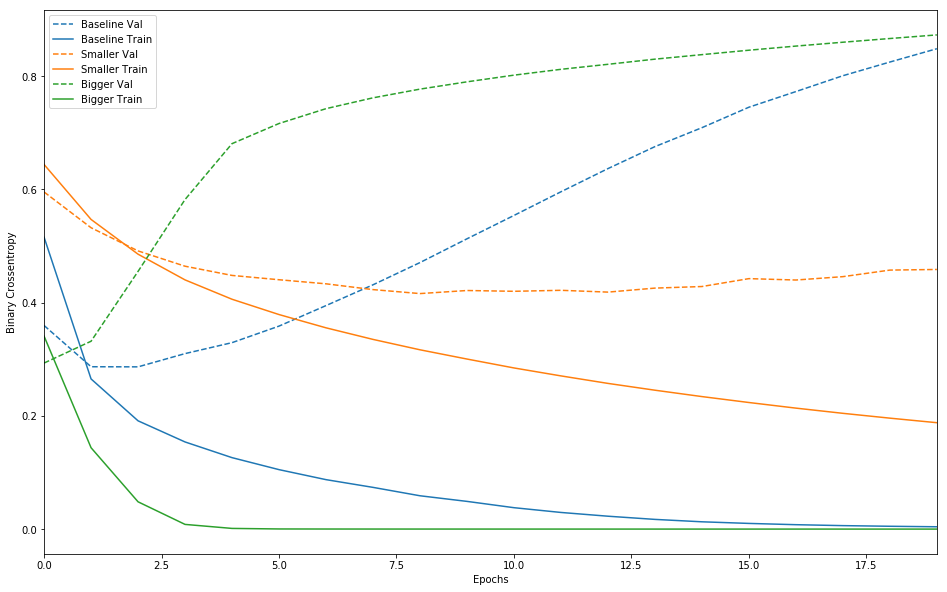

In [17]:
plot_history([
    ('baseline', baseline_history),
    ('smaller', smaller_history),
    ('bigger', bigger_history)
])

In [18]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

l2_model_history = l2_model.fit(
    train_data, 
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 10s - loss: 0.4990 - accuracy: 0.8164 - binary_crossentropy: 0.4600 - val_loss: 0.3643 - val_accuracy: 0.8783 - val_binary_crossentropy: 0.3238
Epoch 2/20
25000/25000 - 9s - loss: 0.2898 - accuracy: 0.9109 - binary_crossentropy: 0.2457 - val_loss: 0.3311 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2842
Epoch 3/20
25000/25000 - 8s - loss: 0.2416 - accuracy: 0.9323 - binary_crossentropy: 0.1923 - val_loss: 0.3357 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2849
Epoch 4/20
25000/25000 - 8s - loss: 0.2199 - accuracy: 0.9422 - binary_crossentropy: 0.1673 - val_loss: 0.3534 - val_accuracy: 0.8792 - val_binary_crossentropy: 0.2996
Epoch 5/20
25000/25000 - 8s - loss: 0.2046 - accuracy: 0.9494 - binary_crossentropy: 0.1496 - val_loss: 0.3664 - val_accuracy: 0.8770 - val_binary_crossentropy: 0.3104
Epoch 6/20
25000/25000 - 8s - loss: 0.1929 - accuracy: 0.9552 - binary_crossentropy: 0.1360 - val_loss: 0.379

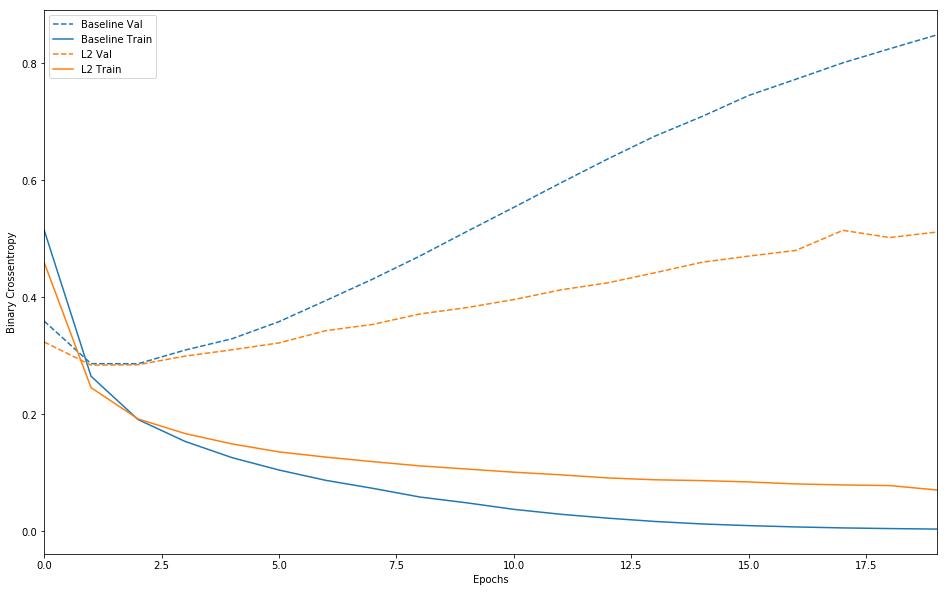

In [20]:
plot_history([
    ('baseline', baseline_history),
    ('l2', l2_model_history)
])

In [21]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','binary_crossentropy']
)

dpt_model_history = dpt_model.fit(
    train_data, 
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 11s - loss: 0.5886 - accuracy: 0.6879 - binary_crossentropy: 0.5886 - val_loss: 0.4172 - val_accuracy: 0.8619 - val_binary_crossentropy: 0.4172
Epoch 2/20
25000/25000 - 9s - loss: 0.4030 - accuracy: 0.8394 - binary_crossentropy: 0.4030 - val_loss: 0.3051 - val_accuracy: 0.8839 - val_binary_crossentropy: 0.3051
Epoch 3/20
25000/25000 - 9s - loss: 0.3162 - accuracy: 0.8840 - binary_crossentropy: 0.3162 - val_loss: 0.2840 - val_accuracy: 0.8852 - val_binary_crossentropy: 0.2840
Epoch 4/20
25000/25000 - 9s - loss: 0.2643 - accuracy: 0.9083 - binary_crossentropy: 0.2643 - val_loss: 0.2752 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2752
Epoch 5/20
25000/25000 - 9s - loss: 0.2265 - accuracy: 0.9236 - binary_crossentropy: 0.2265 - val_loss: 0.2843 - val_accuracy: 0.8877 - val_binary_crossentropy: 0.2843
Epoch 6/20
25000/25000 - 9s - loss: 0.1981 - accuracy: 0.9335 - binary_crossentropy: 0.1981 - val_loss: 0.292

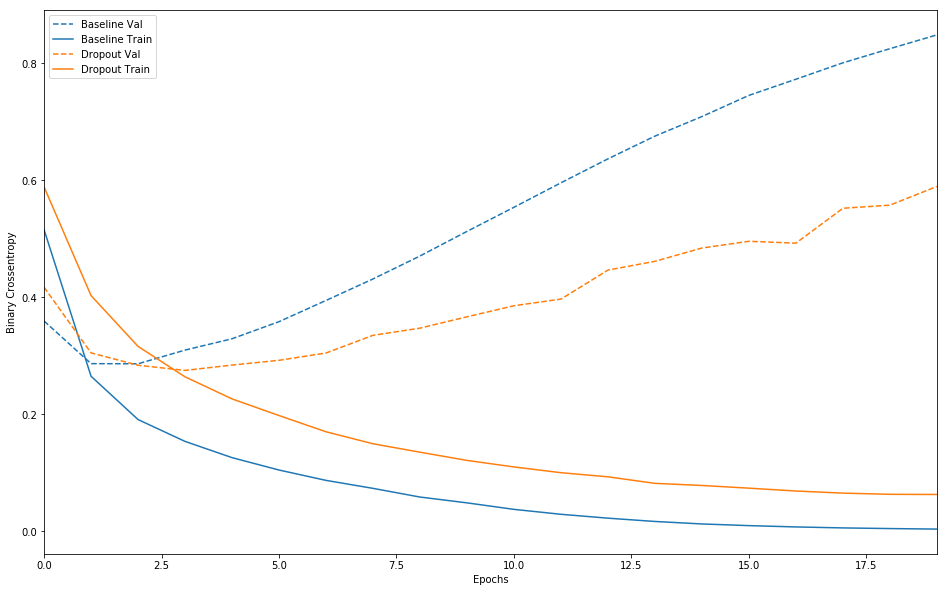

In [22]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])